In [2]:
# Load needed modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Function that returns the Cross-Validation log_loss score
def get_log_loss(grid_search_obj):
    print("Best log_loss score: {:.5f}".format(-1 * grid_search_obj.best_score_))

In [4]:
# Function that uses RandomForest to return most important features
def rf_feature_selection(df, X, y):
    # Create a random forest
    from sklearn.ensemble import RandomForestClassifier

    # Get the columns
    cols = df.columns[3:-1]

    # Make the forest
    forest = RandomForestClassifier(n_estimators=100, n_jobs=2)

    # Fit
    forest.fit(X,y)

    # Get the importances
    importances = forest.feature_importances_

    # Get the indices
    indices = np.argsort(importances)[::-1]

    # Show the importance of each feature
    for f in range(X.shape[1]):
        print("{} - {}".format(cols[f], importances[indices[f]]))

In [5]:
# Function that takes the probabilities and ids and saves them to a CSV file
def save_predictions(probabilities, tourney_df, tournament_nbr=60):
    import pandas as pd
    
    # Get the probability of 1
    prob_of_one = probabilities[:, 1]
    
    # Get the IDs
    ids = tourney_df['id']
    
    # Join the data into one DataFrame
    results = pd.DataFrame(data={'probability': prob_of_one})
    results = pd.DataFrame(ids).join(results)
    
    # Save to CSV
    results.to_csv("probabilities_{}.csv".format(tournament_nbr), index=False)

In [6]:
# Load the data
# File path
train_path = '/Users/taylordye/Desktop/numerai_datasets/numerai_training_data.csv'
train_df = pd.read_csv(train_path)

train_df.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,440255,era1,train,0.26647,0.42487,0.81401,0.22889,0.27456,0.55654,0.55310,...,0.18847,0.77235,0.55002,0.20237,0.79605,0.82971,0.45757,0.69761,0.53739,1
1,420205,era1,train,0.41334,0.47533,0.71847,0.40792,0.32433,0.55806,0.59592,...,0.32083,0.72435,0.63751,0.29143,0.67860,0.70083,0.59967,0.53103,0.47446,1
2,409239,era1,train,0.48937,0.56030,0.59150,0.46432,0.42291,0.54177,0.53542,...,0.42195,0.62651,0.51604,0.42938,0.56744,0.60008,0.46966,0.50322,0.42803,1
3,448661,era1,train,0.61195,0.65958,0.45877,0.56730,0.51889,0.45049,0.56030,...,0.54803,0.59120,0.58160,0.51828,0.43870,0.47011,0.56007,0.36374,0.31552,1
4,399213,era1,train,0.43758,0.50085,0.60446,0.46663,0.47157,0.59667,0.40161,...,0.40535,0.54366,0.44763,0.37668,0.59931,0.59539,0.43771,0.54767,0.43742,1


In [7]:
# Load the tournement data
test_path = '/Users/taylordye/Desktop/numerai_datasets/numerai_tournament_data.csv'
tournament_df = pd.read_csv(test_path)
tournament_df.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,446551,era97,validation,0.54177,0.64267,0.54365,0.53625,0.43622,0.49010,0.59626,...,0.46999,0.65848,0.61414,0.46340,0.51415,0.54882,0.54992,0.39919,0.33837,1.0
1,384542,era97,validation,0.46513,0.55879,0.61386,0.48131,0.39930,0.41525,0.54916,...,0.39465,0.66286,0.58364,0.38549,0.59305,0.61357,0.52784,0.46704,0.37416,1.0
2,352413,era97,validation,0.57906,0.57836,0.55062,0.50582,0.42531,0.53203,0.61312,...,0.48369,0.63943,0.56807,0.48388,0.50785,0.55630,0.55099,0.43983,0.43469,0.0
3,397163,era97,validation,0.49406,0.57476,0.59178,0.50592,0.44062,0.54272,0.55000,...,0.43125,0.64981,0.64190,0.37122,0.56728,0.57653,0.61470,0.42992,0.36342,1.0
4,483655,era97,validation,0.59719,0.45569,0.55065,0.41892,0.45174,0.47165,0.56128,...,0.48639,0.57764,0.45624,0.47852,0.51380,0.56741,0.52313,0.53296,0.55182,1.0


#### Preprocess, Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale
X_train = train_df.loc[:, 'feature1':'feature21']
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(tournament_df.loc[:, 'feature1':'feature21']))

In [9]:
# Get the response/targets
y_train = train_df.loc[:, 'target']
y_test = tournament_df.loc[:, 'target']

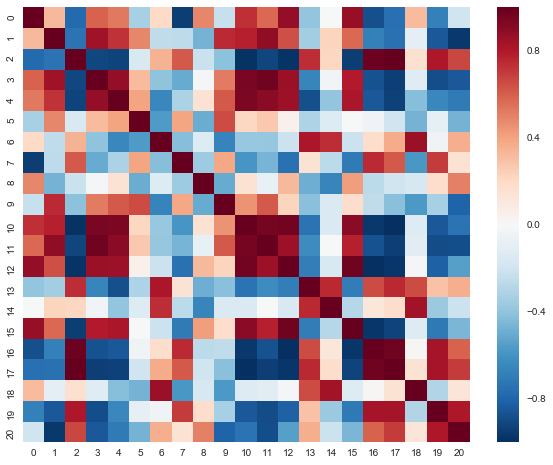

In [10]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_train_scaled.corr(), ax=ax);

A lot of our features tend to be correlated. We should apply some dimensionality reductions

- So, since we have some collinearity, I think PCA could be good.

Make a Pipeline to increase workflow and test how different models behave after we've performed feature selection

In [ ]:
# Load the functions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create the Pipeline w/ 
pipe_lda_logit = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=2)),
                           ('logit', LogisticRegression(C=1.0, n_jobs=-1))])

In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Grid search object
logit_params = {'logit__C':[0.1, 1.0], 'logit__penalty':['l1', 'l2']}
pipe_logit_gs = GridSearchCV(estimator=pipe_lda_logit, scoring='neg_log_loss', n_jobs=-1, param_grid=logit_params)

# Get the average score
pipe_logit_score = cross_val_score(estimator=pipe_logit_gs, X=X_train_scaled, y=y_train, scoring='neg_log_loss',
                                  n_jobs=-1).mean()

In [ ]:
# Print score
print('Average log-loss: {:.5f}'.format(-1* pipe_logit_score))

In [ ]:
# Fit the pipeline
pipe_lda_logit.fit(X_train_scaled, y_train)

In [ ]:
# Predict 
pipe_logit_score = pipe_lda_logit.predict_proba(X_test_scaled)

In [ ]:
# Save the results
save_predictions(pipe_logit_score, tournament_df)

Principle Component Analysis + Logistic Regression

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Transform our data via PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Cross-Validate
cv_score_avg = cross_val_score(estimator=LogisticRegression(C=0.01, n_jobs=2), X=X_train_pca, y=y_train, 
                               n_jobs=-1, scoring='neg_log_loss', cv=3).mean()

Simple Logistic Regression w/ C=0.01

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logit_preds = LogisticRegression(C=0.01, n_jobs=2).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

# Save the predictions
save_predictions(logit_preds, tournament_df)

Log-loss validation score: 0.69245

RandomForests

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# Instantiate, fit, predict, sumbit
rfc_preds = RandomForestClassifier(n_estimators=150, n_jobs=2).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

# Save and submit
save_predictions(rfc_preds, tournament_df)

Ensemble modelling

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create list of tuples to feed the VotingClassifier
ensemble = [('knn', KNeighborsClassifier(n_jobs=2)), ('logit', LogisticRegression(C=0.01, n_jobs=2)),
            ('dt', DecisionTreeClassifier())]

# Create the ensemble
ensemble = VotingClassifier(estimators=ensemble, voting='soft', n_jobs=2).fit(X_train_scaled, y_train)

# Predict
ensemble_preds = ensemble.predict_proba(X_test_scaled)

In [21]:
# Save the ensemble preds
save_predictions(ensemble_preds, tournament_df)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Create an ensemble of LogisticRegressions with the Adaptive Boosting technique
ada_logit = AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1, n_jobs=2)).fit(X_train_scaled, y_train)

# Create and save ada_logit predictions
save_predictions(ada_logit.predict_proba(X_test_scaled), tournament_df)

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Create an ensemble of LogRed w/ Bootstrap aggregating method
bag_logit = BaggingClassifier(base_estimator=LogisticRegression(n_jobs=2)).fit(X_train_scaled, y_train)

# Create and save predictions
save_predictions(bag_logit.predict_proba(X_test_scaled), tournament_df)

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create list of tuples to feed the VotingClassifier
ensemble = [('logit', LogisticRegression(C=0.01, n_jobs=2)), ('rfc', RandomForestClassifier(n_jobs=2))]

# Create the ensemble
ensemble = VotingClassifier(estimators=ensemble, voting='soft', n_jobs=2).fit(X_train_scaled, y_train)

# Predict
ensemble_preds = ensemble.predict_proba(X_test_scaled)

Let's use our function to get the most discriminative features.
- Appears features 1-3 seem to be relatively the most predictive features

In [31]:
rfc_features = rf_feature_selection(train_df, X_train_scaled, y_train)

feature1 - 0.05410199355078408
feature2 - 0.0516827099777748
feature3 - 0.05034745177256093
feature4 - 0.049617498576821045
feature5 - 0.04943397458069636
feature6 - 0.04924820137850855
feature7 - 0.04899154116567237
feature8 - 0.04858008649788203
feature9 - 0.04793710323792653
feature10 - 0.04762055436474153
feature11 - 0.04759705358354533
feature12 - 0.047473269837563024
feature13 - 0.04714380602832054
feature14 - 0.04686174352690778
feature15 - 0.046240884781652794
feature16 - 0.0453647163587661
feature17 - 0.04533585522009422
feature18 - 0.04465922690638842
feature19 - 0.04406341166126276
feature20 - 0.04395807034868314
feature21 - 0.04374084664344762


In [44]:
# Use features 1-4 to build a model
from sklearn.ensemble import BaggingClassifier

bag_logit = BaggingClassifier(base_estimator=LogisticRegression(n_jobs=2)).fit(X_train_scaled.iloc[:, 0:4], y_train)

# Save predictions
save_predictions(bag_logit.predict_proba(X_test_scaled.iloc[:, 0:4]), tournament_df)

In [49]:
# Try similar approach, except with Trees
# Use features 1-4 to build a model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_trees = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500).fit(X_train_scaled.iloc[:, 0:4],
                                                                                          y_train)

# Save predictions
save_predictions(bag_trees.predict_proba(X_test_scaled.iloc[:, 0:4]), tournament_df)

Implement PCA to dimensionality reduce our features

In [62]:
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Get the principle components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)

# Make a AdaBoost classifier w/ LogisticRegression as the base
ada_logit = AdaBoostClassifier(base_estimator=LogisticRegression(n_jobs=2, C=0.001), n_estimators=200).fit(X_train_pca,
                                                                                                      y_train)

# Save and submit
save_predictions(ada_logit.predict_proba(pca.transform(X_test_scaled)), tournament_df)

StochasticGradientDescent

In [69]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier

# Make Adaboost classifier w/ SGD Classifier
ada_sgd = AdaBoostClassifier(base_estimator=SGDClassifier(loss='log', n_jobs=2), n_estimators=300).fit(X_train_pca,
                                                                                                       y_train)

# Save
save_predictions(ada_sgd.predict_proba(pca.transform(X_test_scaled)), tournament_df)